In [109]:
# -*- coding: utf-8 -*-
"""
Created on Tue Aug 24 16:24:52 2021

@author: Joschka
"""

import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.insert(0,'..')

from src import coil_class as BC
from src import physical_constants as cs

#from IPython import get_ipython
#get_ipython().run_line_magic('matplotlib', 'qt')
#get_ipython().run_line_magic('matplotlib', 'inline')


from scipy.optimize import curve_fit
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.5

## Set up coils

In [274]:
HH = 1
I = 5

d_coils = 50
Radius = 30

layers = 4
windings = 4
wire_width = 1
wire_height = 1

Coil = BC.BCoil(HH,d_coils,Radius, layers, windings, wire_width, wire_height)

20


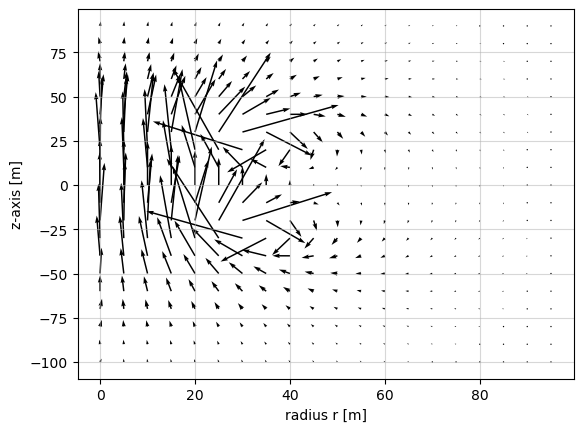

In [287]:
z = np.arange(-100,100,10)
print(np.size(z))
r = np.arange(1e-15,100,5)

B, B_tot = Coil.B_multiple_3d(I, r,z,raster = 4)

z_m, r_m = np.meshgrid(z,r)

#plt.figure(figsize=(16,10))
plt.quiver(r_m,z_m,B[:,:,1],B[:,:,0])
plt.xlabel("radius r [m]")
plt.ylabel("z-axis [m]")
plt.show()

In [276]:
z = np.arange(-100,100,1)
r = np.arange(1e-3,100,1)

B, B_tot = Coil.B_multiple_3d(I, r,z,raster = 2)

z_m, r_m = np.meshgrid(z,r)

In [277]:
x = np.concatenate((-np.flip(r),r))
B_tot_x = np.concatenate((np.flip(B_tot[:,len(z)//2]),B_tot[:,len(z)//2]))
B_tot_z = B_tot[0,:]


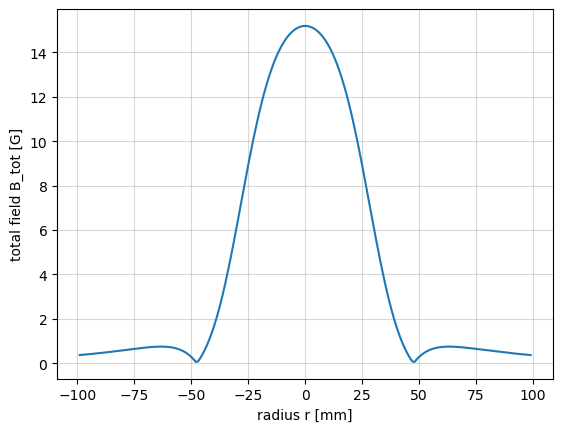

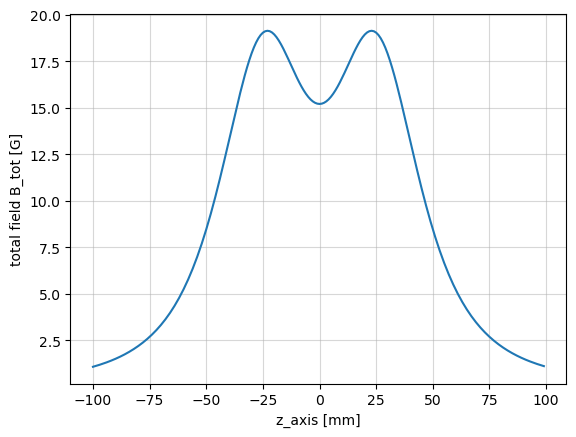

'\nplt.plot(x,np.gradient(B_tot_x,x))\nplt.xlabel("radius r [mm]")\nplt.ylabel("total field B_tot [G]")\n#plt.xlim(0,0.01)\nplt.show()\nplt.plot(z,np.gradient(B_tot[0,:],z))\nplt.xlabel("z_axis [mm]")\nplt.ylabel("total field B_tot [G]")\nplt.show()\n'

In [278]:
plt.plot(x,B_tot_x)
plt.xlabel("radius r [mm]")
plt.ylabel("total field B_tot [G]")
#plt.xlim(-0.1,0.1)
plt.show()
plt.plot(z,B_tot_z)
plt.xlabel("z_axis [mm]")
plt.ylabel("total field B_tot [G]")
plt.show()

"""
plt.plot(x,np.gradient(B_tot_x,x))
plt.xlabel("radius r [mm]")
plt.ylabel("total field B_tot [G]")
#plt.xlim(0,0.01)
plt.show()
plt.plot(z,np.gradient(B_tot[0,:],z))
plt.xlabel("z_axis [mm]")
plt.ylabel("total field B_tot [G]")
plt.show()
"""

## Fit harmonic function

In [279]:
def func(x,a,b):
    return a*x**2+b

x_SI = 1e-3 * x
z_SI = 1e-3 * z

B_tot_x_SI = 1e-4*B_tot_x
B_tot_z_SI = 1e-4*B_tot_z


In [280]:
nr_points = 20
a = 100-nr_points//2
b = 100+ nr_points//2
popt_x, pcov = curve_fit(func,x_SI[a:b],B_tot_x_SI[a:b])

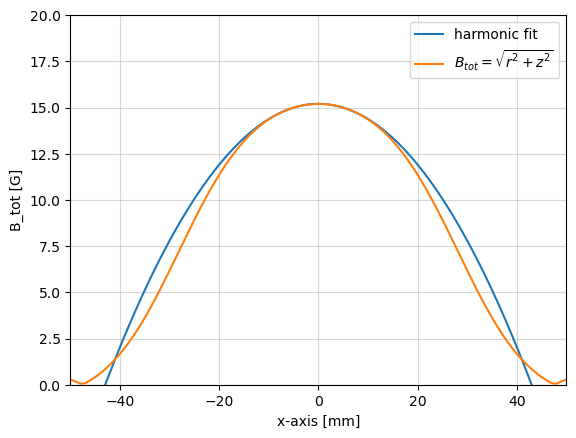

In [286]:
plt.plot(1e3*x_SI,1e4*func(x_SI,popt_x[0],popt_x[1]),label = "harmonic fit")
plt.plot(1e3*x_SI,1e4*B_tot_x_SI, label = r"$ B_{tot} = \sqrt{r^2 + z^2} $" )
#plt.ylim(0,8)
#plt.xlim(-0.01,0.01)
plt.xlabel("x-axis [mm]")
plt.xlim(-50,50)
plt.ylim(0,20)
plt.ylabel("B_tot [G]")
plt.legend()
plt.show()

In [282]:
nr_points = 20
a = 100-nr_points//2
b = 100+ nr_points//2
popt_z, pcov = curve_fit(func,z_SI[a:b],B_tot_z_SI[a:b])

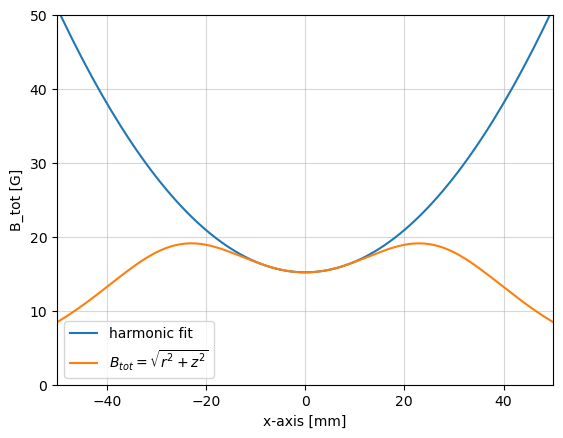

In [285]:
plt.plot(1e3*z_SI,1e4*func(z_SI,popt_z[0],popt_z[1]),label = "harmonic fit")
plt.plot(1e3*z_SI,1e4*B_tot_z_SI, label = r"$ B_{tot} = \sqrt{r^2 + z^2} $")
plt.xlabel("x-axis [mm]")
plt.xlim(-50,50)
plt.ylim(0,50)
plt.ylabel("B_tot [G]")
plt.legend()
plt.show()

In [289]:
m = 2.69e-25

k_x = -2*popt_x[0]*9.9*cs.mu_B

omega = np.sqrt(k_x/m)
f = omega/(2*np.pi)

T = 1/f
T_exp = T/4
print(f"T_expansion = T/4 = {T_exp*1e3} ms" )
print(f"omega_x = {omega}") 

t_tof = 20e-3
M = omega * t_tof

print(f"Magnification for t_tof = {t_tof*1e3} ms: M = {M}")


start_z = 1e-6
d_t = 1e-3
def force(z):
    return 2*0.248*z*9.9*cs.mu_B
z = start_z
v = 0
for t in np.arange(0,T_exp,d_t):
    v = v + force(z)/m * d_t
    #print(v)
    z = z + v * d_t
print(f"for z_start = 1 μm after T_expansion z_end = {z*1e6} μm")


T_expansion = T/4 = 66.2961644033217 ms
omega_x = 23.69362301623883
Magnification for t_tof = 20.0 ms: M = 0.47387246032477665
for z_start = 1 μm after T_expansion z_end = 1.4110642480981759 μm
